 Here I am using PIMA diabetes dataset.
 the link to dataset is  https://github.com/kaggle/docker-python

In [2]:
# we need some libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools # plotting library
import plotly.plotly as py 

In [6]:
import os # for Files and OS functions
print(os.listdir('./input'))

['diabetes.csv']


In [23]:
df=pd.read_csv('./input/diabetes.csv') # reading the file in pandas dataframe

In [24]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
df.describe() # fetching statistics from within the dataframe

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
df.info()  #  More info and datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [28]:
df.shape # shape of array

(768, 9)

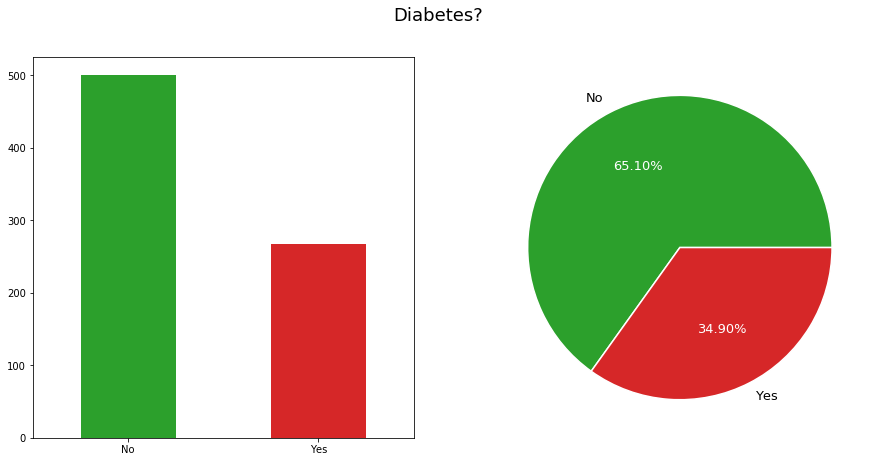

In [46]:
f,ax=plt.subplots(1,2,figsize=(15,7)) # in 1 row and two columns of the plot grid 
                                        #setting up plots of size (15,7)
f.suptitle('Diabetes?',fontsize=18.) # setting up title for the grid

#now setting up the individual plots using ax[] array which handles individual grid box. 

# first chart is bar chart, using column outcomes and diabetes status as No, yes labels on x axis. 
#it actually plots diabetes yes or no count on bar chart. Colors are taken from seaborn palette.

_=df.Outcome.value_counts().plot.bar(ax=ax[0],rot=0,color=(sns.color_palette()[2],
                                                         sns.color_palette()[3])).set(xticklabels=['No', 'Yes'])

# Now we control the second grid box. its a pie chard with percentage. 
#It uses outcome as source of data and labels as yes no as pie components. 
#Look how the formatting of the chart is controlled.
_ = df.Outcome.value_counts().plot.pie(labels = ('No','Yes'), autopct='%.2f%%',    label="",   fontsize = 13., ax = ax[1],colors = (sns.color_palette()[2], sns.color_palette()[3]),  wedgeprops = {"linewidth":1.5,'edgecolor':'white'}),    ax[1].texts[1].set_color('white'), ax[1].texts[3].set_color('white')


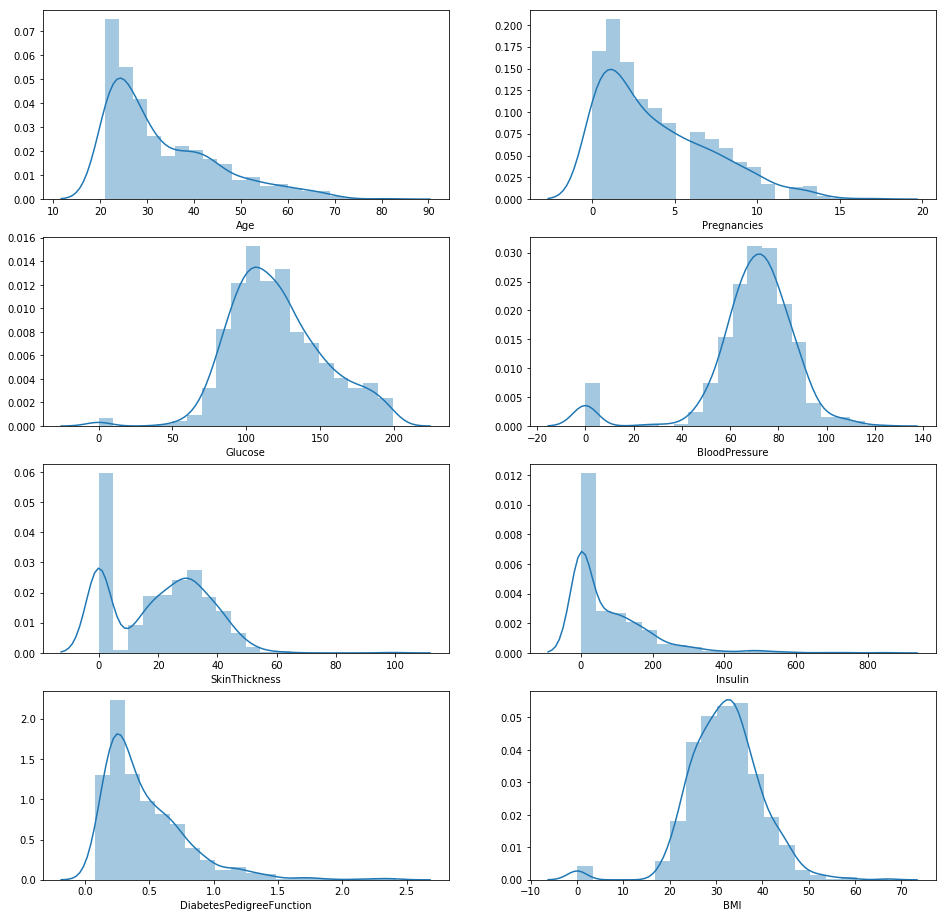

In [54]:
# visualizing more data. using gird a of 4x2.
# First step is to "bin" (or "bucket") the range of values—that is, 
#divide the entire range of values into a series of intervals—and then count how many values fall into each interval. 
#The bins are usually specified as consecutive, non-overlapping intervals of a variable.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

Text(0.5, 1.0, 'Correlation Between features')

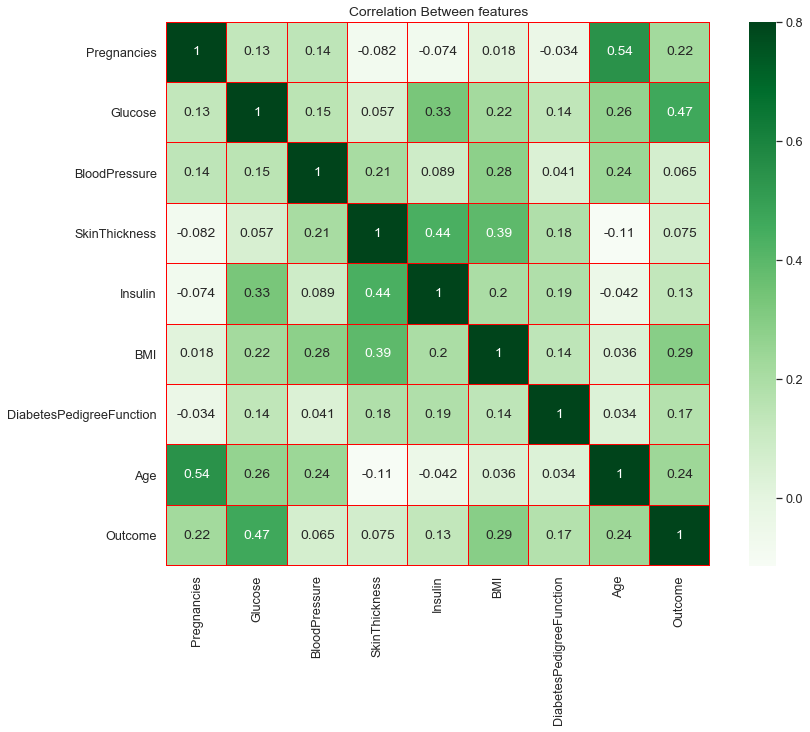

In [62]:
# correlating the features and plotting a heat map chart. 
#The correlation is how a change in variable affects the other variable
corr=df.corr()
sns.set(font_scale=1.15)
plt.figure(figsize=(14,10))
sns.heatmap(corr,vmax=.8,linewidths=0.01,square=True,annot=True,cmap='Greens',linecolor='red')
plt.title('Correlation Between features')

#### Now we generate a model and train it to predict unknown values

In [84]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

### Using The decision Tree
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node (e.g., Outlook) has two or more branches (e.g., Sunny, Overcast and Rainy), each representing values for the attribute tested. Leaf node (e.g., Hours Played) represents a decision on the numerical target. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

In [78]:
DT=DecisionTreeClassifier()

In [79]:
DT.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [80]:
y_pred=DT.predict(X_test)

In [81]:
print('Accuracy',DT.score(X_test,y_test)*100)

Accuracy 72.91666666666666


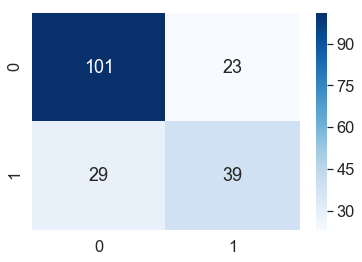

In [83]:
#now plotting the cofusion matrix which shows how the model scored.
# A confusion matrix shows how for each prediction the model performed. Where
#it was correct and when it was not correct
sns.set(font_scale=1.5)
cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True,fmt='g',cmap='Blues')
plt.show()


### using Gradient Boosting
Gradient boosting is a machine learning technique for regression and classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. It builds the model in a stage-wise fashion like other boosting methods do, and it generalizes them by allowing optimization of an arbitrary differentiable loss function.



model = GradientBoostingClassifier()

#fiting the model
model.fit(X_train, y_train)

#prediction
y_pred = model.predict(X_test)

#Accuracy
print("Accuracy ", model.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
plt.show()

### Logistic Regression
Logistic regression is the appropriate
regression analysis to conduct when the dependent variable is
binary. Like all regression analyses, the logistic regression is
a predictive analysis. Logistic regression is used to
describe data and to explain the relationship between
one dependent binary variable and one or more nominal, ordinal,
interval or ratio-level independent variables.

C:\Users\Shujjat Ali\Anaconda3\envs\dev\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Accuracy  80.72916666666666


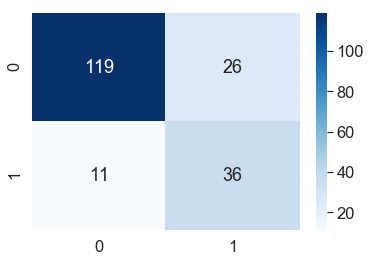

In [87]:
#Model
LR = LogisticRegression()

#fiting the model
LR.fit(X_train, y_train)

#prediction
y_pred = LR.predict(X_test)

#Accuracy
print("Accuracy ", LR.score(X_test, y_test)*100)

#Plot the confusion matrix
sns.set(font_scale=1.5)
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
plt.show()

### Discalimer
The note book is actually and adaptation of the work at https://www.kaggle.com/saurabh00/pima-indian-diabetes/notebook.
    